<a href="https://colab.research.google.com/github/Alexher90/An-lisis-de-Datos-2/blob/master/Startup_Miniproyecto_1_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
# Micro-Proyecto 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

A continuación escriba los nombres de los integrantes del grupo.

Nombres:


### Introducción
Una *start-up* agrícola quiere construir una aplicación online que conecte el campo
con la ciudad de manera directa y sin intermediarios. De esta manera, los agricultores ponen a la disposición de la empresa sus distintos productos, y la start-up se encarga de atender las necesidades de demanda distribuyendo los productos hasta los clientes finales en la ciudad.

Para optimizar la gestión logística y desarrollar esta labor de manera eficiente, los dueños de la *start-up* han visto la necesidad de diseñar e implementar un sistema de gestión y predicción que les permita planear con la debida anticipación la demanda esperada. Así podrán coordinar las actividades de producción, junto con los agricultores, y atender la demanda mientras se minimizan las pérdidas por unidades de producto no vendido o estropeado. 

Este es un reto altamente relevante para la sostenibilidad de la industria alimentaria, donde gran cantidad de las pérdidas se refieren a grupos alimenticios donde la frescura del producto es un importante criterio para el consumo. El desperdicio de los alimentos se relaciona con el sobre-pedido o el sobre-almacenamiento, lo cual puede a su vez ser consecuencia de dificultades en el pronóstico de la demanda. Este problema es aun más marcado a medida que uno sube en la cadena de producción y se aleja de los patrones de comportamiento del consumidor final. 

Por lo tanto, la start-up agrícola debe gestionar los inventarios de manera inteligente, disminuyendo la ventana de tiempo entre cosecha y consumo. Para ello, necesita desarrollar modelos de predicción de demanda que apoyen su operación, logrando la disponibilidad de los productos para atender a los clientes del día siguiente, minimizando los desperdicios de alimentos e identificando hábitos de consumo que le permita optimizar sus operaciones logísticas y de negocio.

### Enunciado
Por ello se le pide a usted, en calidad de consultor externo, desarrollar un modelo predictivo de demanda para los productos más relevantes con los que trabaja la start-up agrícola, obteniendo una predicción a nivel semanal (una semana adelante). Los datos los encuentra en el archivo DatosAgro.txt, donde se tiene la identificación del cliente, la fecha en que realizó el pedido, la magnitud del pedido (en unidades según lo especificado en el nombre del producto), su precio, y el código del producto agrícola que consta en el pedido.

**Presentado por: Alexander Hernández Páez (200920588), Alexander Camargo (200911325), Juan David Cortés (201728568), Wilson Felipe González (200924943)**

## 1. Visualicemos los datos

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Importemos los datos y visualizemos la serie de tiempo
data = pd.read_csv("DatosAgro.txt", delimiter='\t', encoding="utf8")
data = data.drop('Unnamed: 6', 1)
data=pd.DataFrame(data)
data.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
0,Cliente26,18/09/2017,20,700,VER0049,Yerbabuena / 100 gramos
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra
2,Cliente26,18/09/2017,4,1600,VER0041,Puerro / Libra
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra


Veamos los clientes con mayor participación en la demanda:

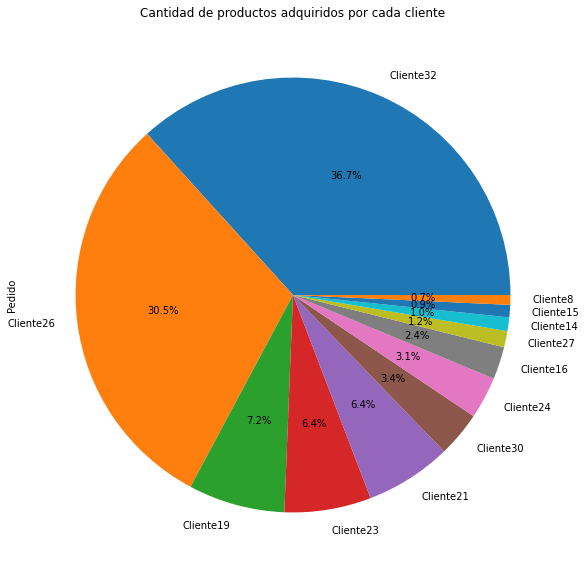

In [ ]:
cliente = pd.DataFrame(data[data['Pedido'] > 10].groupby(data["Cliente"]).sum())
cliente2 = cliente[cliente['Pedido']>50]
cliente3 = cliente2.sort_values("Pedido", ascending= False)
cliente3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%')
plt.title("Cantidad de productos adquiridos por cada cliente")
plt.show()

Vemaos los productos con más volumen de pedido:

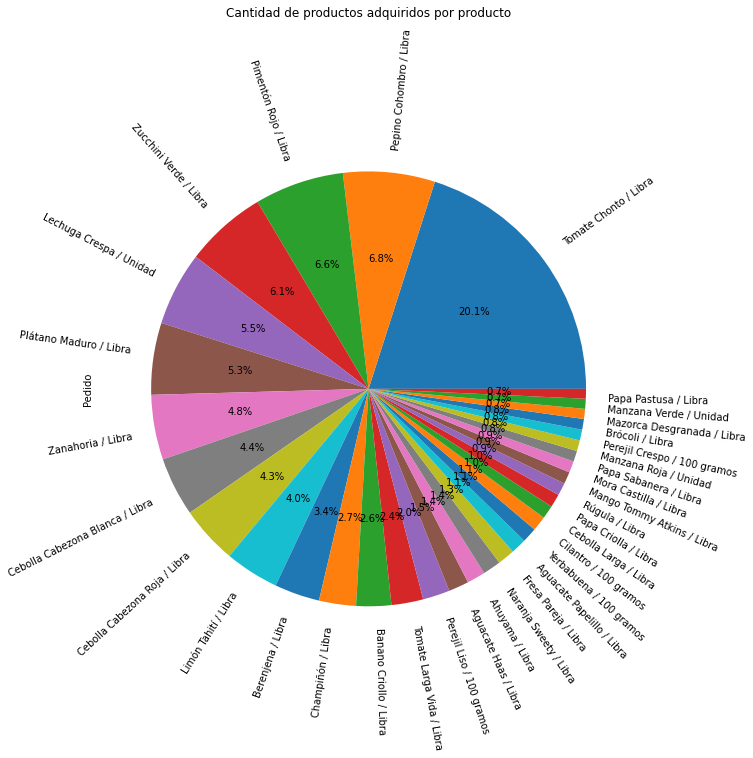

In [ ]:
productos = pd.DataFrame(data["Pedido"].groupby(data["Nombre_producto"]).sum())
productos2 = productos[productos['Pedido']>140]
productos3 = productos2.sort_values("Pedido", ascending= False)
productos3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%', rotatelabels=True)
plt.title("Cantidad de productos adquiridos por producto", pad=100)
plt.show()

A continuación implemente la metodología propuesta para construir su modelo:

In [ ]:
# Se genera la columna de Ingresos:
data['Ingresos'] = data['Pedido'] * data['Precio']
data.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,Ingresos
0,Cliente26,18/09/2017,20,700,VER0049,Yerbabuena / 100 gramos,14000
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra,12000
2,Cliente26,18/09/2017,4,1600,VER0041,Puerro / Libra,6400
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra,15000
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra,8800


In [ ]:
data["Ingresos"].describe()

count      4712.000000
mean       8171.969440
std       12596.000711
min         400.000000
25%        2200.000000
50%        4500.000000
75%       10500.000000
max      440000.000000
Name: Ingresos, dtype: float64

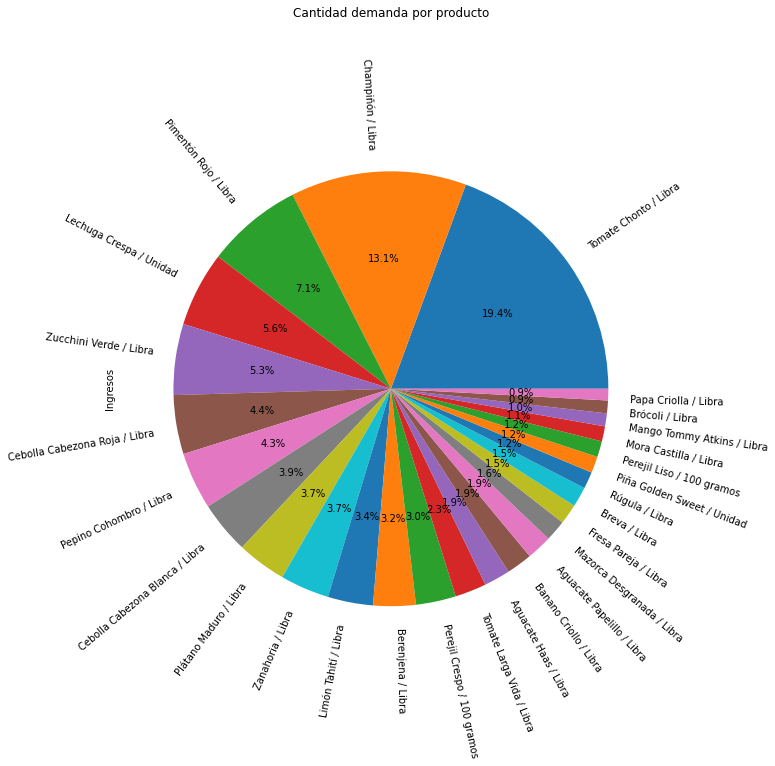

In [ ]:
ingresos1 = pd.DataFrame(data["Ingresos"].groupby(data["Nombre_producto"]).sum())
ingresos2 = pd.DataFrame(ingresos1[ingresos1["Ingresos"]>=260000])
ingresos3 = ingresos2.sort_values("Ingresos", ascending= False)
ingresos3.plot.pie(y='Ingresos', figsize=(10, 10), legend=False, autopct='%1.1f%%', rotatelabels=True)
plt.title("Cantidad demanda por producto", pad=100)
plt.show()

In [ ]:
#Comprobamos que obtenemos los productos que representan el 80% de los ingresos:
sum(ingresos2["Ingresos"]) / sum(data["Ingresos"])

0.8007669909770656

In [ ]:
#Cantidad de productos con el 80% de los ingresos totales
ingresos2.count()

Ingresos    27
dtype: int64

## filtrando los datos según la definición de productos más importantes:

In [ ]:
[c for c in data]

['Cliente',
 'Fecha',
 'Pedido',
 'Precio',
 'Producto',
 'Nombre_producto',
 'Ingresos']

In [ ]:
indice_prodsimport=list(ingresos3.index)
indice_prodsimport

['Tomate Chonto / Libra',
 'Champiñón / Libra',
 'Pimentón Rojo / Libra',
 'Lechuga Crespa / Unidad',
 'Zucchini Verde / Libra',
 'Cebolla Cabezona Roja / Libra',
 'Pepino Cohombro / Libra',
 'Cebolla Cabezona Blanca / Libra',
 'Plátano Maduro / Libra',
 'Zanahoria / Libra',
 'Limón Tahití / Libra',
 'Berenjena / Libra',
 'Perejil Crespo / 100 gramos',
 'Tomate Larga Vida / Libra',
 'Aguacate Haas / Libra',
 'Banano Criollo / Libra',
 'Aguacate Papelillo / Libra',
 'Mazorca Desgranada / Libra',
 'Fresa Pareja / Libra',
 'Breva / Libra',
 'Rúgula / Libra',
 'Piña Golden Sweet / Unidad',
 'Perejil Liso / 100 gramos',
 'Mora Castilla / Libra',
 'Mango Tommy Atkins / Libra',
 'Brócoli / Libra',
 'Papa Criolla / Libra']

In [ ]:
data2=data[data.Nombre_producto.isin(indice_prodsimport)]
data2=pd.DataFrame(data2)

## verificacion de los datos definitivos:
print(
len(
np.unique(data2[["Nombre_producto"]])
)==ingresos2.count()
)

Ingresos    True
dtype: bool


In [ ]:
#Sumamos las cantidades de pedidos por producto en todo el periodo
data5=data2[['Nombre_producto','Pedido']].groupby(['Nombre_producto']).count().sort_values(by = 'Pedido')
data5

,Pedido
Nombre_producto,
Breva / Libra,4
Mazorca Desgranada / Libra,29
Aguacate Haas / Libra,30
Papa Criolla / Libra,48
Plátano Maduro / Libra,57
Rúgula / Libra,59
Perejil Crespo / 100 gramos,61
Brócoli / Libra,67
Tomate Larga Vida / Libra,67


**Con el fin de complementar el estudio de los productos que debemos trabajar en este proyecto, concluimos que descartamos del estudio los productos que hayan reportado una demanda acumulada menor que 100, dado a que estos no cuentan con suficientes datos para poder generar un modelo de predicción como SARIMA:**

In [ ]:
prods_import = data5.index[data5['Pedido'] > 100]

In [ ]:
data2=data[data.Nombre_producto.isin(prods_import)]
data2=pd.DataFrame(data2)
data2

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,Ingresos
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra,12000
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra,15000
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra,8800
6,Cliente26,18/09/2017,24,1000,TUB0012,Zanahoria / Libra,24000
9,Cliente3,18/09/2017,2,1500,VER0038,Pimentón Rojo / Libra,3000
...,...,...,...,...,...,...,...
4674,Cliente32,20/11/2016,20,630,VER0035,Pepino Cohombro / Libra,12600
4676,Cliente32,20/11/2016,5,1600,VER0013,Cebolla Cabezona Roja / Libra,8000
4677,Cliente32,20/11/2016,5,600,VER0010,Zucchini Verde / Libra,3000
4678,Cliente32,20/11/2016,4,1120,VER0007,Berenjena / Libra,4480


In [ ]:
#Comprobamos que los productos mencionados anteriormente ya no se encuentran en nuestra base de estudio:
data5=data2[['Nombre_producto','Pedido']].groupby(['Nombre_producto']).count().sort_values(by = 'Pedido')
data5

,Pedido
Nombre_producto,
Fresa Pareja / Libra,104
Perejil Liso / 100 gramos,105
Zanahoria / Libra,107
Berenjena / Libra,129
Cebolla Cabezona Roja / Libra,143
Limón Tahití / Libra,158
Pimentón Rojo / Libra,161
Zucchini Verde / Libra,164
Lechuga Crespa / Unidad,174


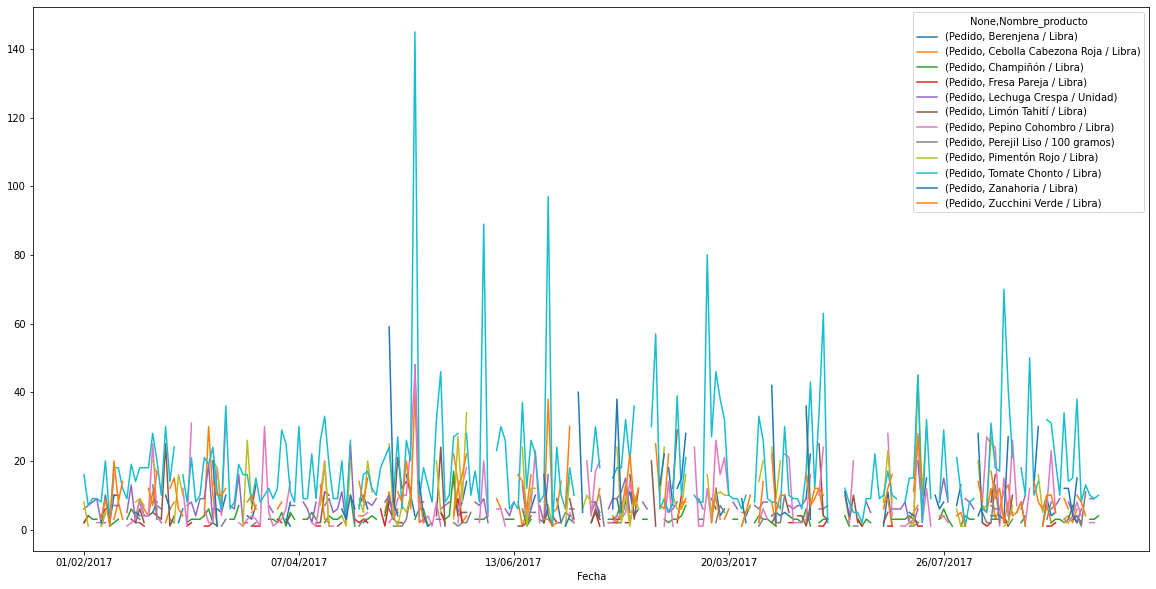

In [ ]:
#Visualizamos los datos históricos de la demanda por día:
data3=data2[['Fecha','Nombre_producto','Pedido']].groupby(['Fecha','Nombre_producto']).sum().fillna(0).unstack()
data3.plot(figsize=(20, 10))

In [ ]:
data2['mesanio'] = pd.to_datetime(data2['Fecha']).dt.to_period('M')
data2.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,Ingresos,mesanio
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra,12000,2017-09
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra,15000,2017-09
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra,8800,2017-09
6,Cliente26,18/09/2017,24,1000,TUB0012,Zanahoria / Libra,24000,2017-09
9,Cliente3,18/09/2017,2,1500,VER0038,Pimentón Rojo / Libra,3000,2017-09


**Visualización de los datos históricos de la base a analizar:**

## Implementación del modelo Prophet:

In [ ]:
import pandas as pd
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
warnings.warn("second example of warning!")
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
from sklearn.metrics import mean_squared_error
import pickle

In [ ]:
prediction_table_prophet = pd.DataFrame([])
champi = []
j=0
for i in data2["Nombre_producto"].unique():
  j=j+1
  champi = data2[data2['Nombre_producto']==i]
  champi['Fecha']= pd.to_datetime(champi['Fecha'])
  champi = champi[['Fecha', 'Pedido']].groupby(['Fecha']).sum()
  champi.sort_values("Fecha", ascending= False)
  champi = pd.DataFrame(champi)
  champi['Fecha'] = champi.index
  champi.rename(columns={'Fecha': 'ds'}, inplace=True)
  champi.rename(columns={'Pedido': 'y'}, inplace=True)
  m = Prophet()
  m.fit(champi)
  future = m.make_future_dataframe(periods=7)
  forecast = m.predict(future)
  metric_df = forecast.set_index('ds')[['yhat']].join(champi.set_index('ds').y).reset_index()
  metric_df.dropna(inplace=True)
  mse = mean_squared_error(metric_df.y, metric_df.yhat)
  #save the model
  pathr =('prophet_model_'+str(j)+'.sav')
  pickle.dump(m, open(pathr, 'wb')) 
  modelo = 'prophet_model_'+str(j)+'.sav'
  prediction_table_prophet = prediction_table_prophet.append(pd.DataFrame({'Nombre_producto': i, 'mse_prophet': mse, 'modelo_prophet':modelo}, index=[0]), ignore_index=True)



prediction_table_prophet

,Nombre_producto,mse_prophet,modelo_prophet
0,Limón Tahití / Libra,41.452687,prophet_model_1.sav
1,Pimentón Rojo / Libra,70.167652,prophet_model_2.sav
2,Zucchini Verde / Libra,34.825896,prophet_model_3.sav
3,Zanahoria / Libra,117.589297,prophet_model_4.sav
4,Lechuga Crespa / Unidad,23.465402,prophet_model_5.sav
5,Champiñón / Libra,3.510715,prophet_model_6.sav
6,Cebolla Cabezona Roja / Libra,38.557396,prophet_model_7.sav
7,Berenjena / Libra,16.301282,prophet_model_8.sav
8,Tomate Chonto / Libra,264.766170,prophet_model_9.sav
9,Pepino Cohombro / Libra,74.751633,prophet_model_10.sav


## Implementación Modelo SARIMA:

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings("ignore")
warnings.warn("second example of warning!")
%matplotlib inline
logging.getLogger('SARIMAX').setLevel(logging.WARNING)

In [ ]:
def op_SARIMA(parameters_list, d, D, s, exog, i):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    err_p = 10000
    for param in tqdm_notebook(parameters_list):
      try:
        model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        if (model.aic < err_p):
          pathr =('sarimax_model_'+str(i)+'.sav')
          pickle.dump(model, open(pathr, 'wb')) 
          err_p = model.aic
          print(err_p)    
      except:
        continue  
    return err_p

In [ ]:
prediction_table_sarimax = pd.DataFrame([])
champi = []
j=0
for i in data2["Nombre_producto"].unique():
  j=j+1
  champi = data2[data2['Nombre_producto']==i]
  champi['Fecha']= pd.to_datetime(champi['Fecha'])
  champi = champi[['Fecha', 'Pedido']].groupby(['Fecha']).sum()
  champi.sort_values("Fecha", ascending= False)
  champi = pd.DataFrame(champi)
  champi.rename(columns={'Fecha': 'ds'}, inplace=True)
  champi.rename(columns={'Pedido': 'y'}, inplace=True)
  champi['y'] = np.log(champi['y'])
  # champi['y'] = champi['y'].diff()
  champi.fillna(0, inplace=True)
  iter = 3
  p = range(0, iter, 1)
  d = 0
  q = range(0, iter, 1)
  P = range(0, iter, 1)
  D = 0
  Q = range(0, iter, 1)
  s = 4
  parameters = product(p, q, P, Q)
  parameters_list = list(parameters)
  result_df = op_SARIMA(parameters_list, d, D, s, champi['y'],j)
  model = pickle.load(open(('sarimax_model_'+str(j)+'.sav'), 'rb'))
  champi['arima_model'] = model.fittedvalues
  forecast = model.predict(start=champi.shape[0], end=champi.shape[0])
  forecast = champi['arima_model'].append(forecast)
  champi['arima_model']
  champi.shape
  champi.loc[:,['y','arima_model']]
  mse = mean_squared_error(np.exp(champi['y']), np.exp(champi['arima_model']))
  modelo = 'sarimax_model_'+str(j)+'.sav'
  prediction_table_sarimax = prediction_table_sarimax.append(pd.DataFrame({'Nombre_producto': i, 'mse_sarimax': mse, 'modelo_sarimax':modelo }, index=[0]), ignore_index=True)
  
prediction_table_sarimax

470.3673875757169
435.2342715204093
414.74550790871047
396.14311963492156
337.2070998598262
325.54572732648484



550.3539599051345
495.3629538940487
474.59006756297936
435.6606629333897
383.494124054853
369.99913261688323



557.4749176265556
493.8726242409429
452.5840294281573
398.0562494860711
328.0063538659103
312.36540076532634



379.3953079489458
326.5393435083593
306.12074113087186
271.54597373690973
254.92847148842569
252.62452403525802
252.50613085856165
251.46627709126648
237.68293685266283



615.8559629293646
510.52745305995984
443.7250853614315
337.3261210308352
278.42326205361235
264.24392601628983
262.7772150020628



518.3771958595926
421.1203030746186
383.048984796867
305.75776622957693
243.61968778986187
238.06184069785934
223.84289775936756



483.1753586185439
414.44073360372863
382.2231277556359
334.8006372006961
290.7657463754473
283.0165062624278
282.33049597342387
281.99789182664387



409.9475135186151
355.59893211848504
320.7440358057313
273.60909015886244
227.00762889717123
215.23013669561837



1055.4413320170552
883.9262406109435
807.9267936849822
625.2775784772957
514.7254083290832
499.11184100862295



669.7036796725101
624.4963226089912
598.5113005825818
575.1552923740547
506.9022046628959
490.67870547514957



262.58749653003633
248.45692381861681
244.71217828139189
239.30729669190208
214.61494484111128
200.1508252742512



299.3738276851391
282.14392327215336
260.2160405128179
244.1287806404705
239.2637456394295
236.6458957724068
234.5708590926474
231.0876821218071
225.62160590529894



,Nombre_producto,mse_sarimax,modelo_sarimax
0,Limón Tahití / Libra,47.785439,sarimax_model_1.sav
1,Pimentón Rojo / Libra,92.309323,sarimax_model_2.sav
2,Zucchini Verde / Libra,40.686876,sarimax_model_3.sav
3,Zanahoria / Libra,147.653240,sarimax_model_4.sav
4,Lechuga Crespa / Unidad,26.775330,sarimax_model_5.sav
5,Champiñón / Libra,4.022669,sarimax_model_6.sav
6,Cebolla Cabezona Roja / Libra,46.512193,sarimax_model_7.sav
7,Berenjena / Libra,18.495013,sarimax_model_8.sav
8,Tomate Chonto / Libra,298.214004,sarimax_model_9.sav
9,Pepino Cohombro / Libra,87.824370,sarimax_model_10.sav


## Redes Temporales

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model

In [ ]:
PASOS=7
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
#Agregamos otra capa
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Dense(5, activation='tanh')) #capa agregada
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [ ]:
prediction_table_nw = pd.DataFrame([])
champi = []
j=0
for i in data2["Nombre_producto"].unique():
  j=j+1
  champi = data2[data2['Nombre_producto']==i]
  champi['Fecha']= pd.to_datetime(champi['Fecha'])
  champi = champi[['Fecha', 'Pedido']].groupby(['Fecha']).sum()
  champi.sort_values("Fecha", ascending= False)
  champi = pd.DataFrame(champi)
  df= champi
  # load dataset
  values = df.values
  # ensure all data is float
  values = values.astype('float32')
  # normalize features
  scaler = MinMaxScaler(feature_range=(-1, 1))
  values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
  scaled = scaler.fit_transform(values)
  # frame as supervised learning
  reframed = series_to_supervised(scaled, PASOS, 1)
  values = reframed.values
  n_train_days = len(df) - (30+PASOS)
  train = values[:n_train_days, :]
  test = values[n_train_days:, :]
  # split into input and outputs
  x_train, y_train = train[:, :-1], train[:, -1]
  x_val, y_val = test[:, :-1], test[:, -1]
  x, y = values[:, :-1], values[:, -1]
  # reshape input to be 3D [samples, timesteps, features]
  x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
  x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
  EPOCHS=40
  model = crear_modeloFF()
  history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)
  results=model.predict(x)
  adimen = [x for x in results]    
  inverted = scaler.inverse_transform(adimen)
  # df['red_pd'] = pd.DataFrame(inverted)
  m = df.iloc[:-PASOS]
  mse = mean_squared_error(m['Pedido'], inverted )
  pathr =('modelo_nw_'+str(j)+'.h5')
  model.save(pathr) 
  modelo = 'modelo_nw_'+str(j)+'.h5'
  prediction_table_nw = prediction_table_nw.append(pd.DataFrame({'Nombre_producto': i, 'mse_nw': mse, 'modelo_nw':modelo }, index=[0]), ignore_index=True)
  
prediction_table_nw

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_73 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_24 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
12/12 [==============================] - 0s 15ms/step - loss: 0.5720 - mse: 0.4577 - val_loss: 0.6182 - val_mse: 0.5003
Epoch 2/40
12/12 [==============================] - 0s 3ms/step - loss: 0.4385 - mse: 0.3132 - val_loss: 0.5167 - val_mse:

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_76 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_25 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
13/13 [==============================] - 0s 14ms/step - loss: 1.1682 - mse: 1.5194 - val_loss: 0.7790 - val_mse: 0.8109
Epoch 2/40
13/13 [==============================] - 0s 3ms/step - loss: 0.9713 - mse: 1.0972 - val_loss: 0.6334 - val_mse:

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_79 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_26 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
13/13 [==============================] - 0s 13ms/step - loss: 1.0600 - mse: 1.3098 - val_loss: 0.9316 - val_mse: 1.1380
Epoch 2/40
13/13 [==============================] - 0s 2ms/step - loss: 0.8991 - mse: 1.0036 - val_loss: 0.8284 - val_mse:

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_82 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_27 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
7/7 [==============================] - 0s 23ms/step - loss: 0.3201 - mse: 0.1555 - val_loss: 0.4146 - val_mse: 0.2880
Epoch 2/40
7/7 [==============================] - 0s 4ms/step - loss: 0.2776 - mse: 0.1377 - val_loss: 0.4105 - val_mse: 0.2

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_85 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_28 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
16/16 [==============================] - 0s 10ms/step - loss: 0.8079 - mse: 0.6929 - val_loss: 0.6545 - val_mse: 0.4986
Epoch 2/40
16/16 [==============================] - 0s 2ms/step - loss: 0.4951 - mse: 0.2755 - val_loss: 0.4312 - val_mse:

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_88 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_29 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
18/18 [==============================] - 0s 10ms/step - loss: 1.4399 - mse: 2.1125 - val_loss: 1.0940 - val_mse: 1.3358
Epoch 2/40
18/18 [==============================] - 0s 2ms/step - loss: 1.2392 - mse: 1.5770 - val_loss: 0.8380 - val_mse:

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_91 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_30 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
12/12 [==============================] - 0s 16ms/step - loss: 0.1973 - mse: 0.1054 - val_loss: 0.3155 - val_mse: 0.2313
Epoch 2/40
12/12 [==============================] - 0s 3ms/step - loss: 0.1953 - mse: 0.1052 - val_loss: 0.3139 - val_mse:

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_94 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_31 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
10/10 [==============================] - 0s 24ms/step - loss: 0.7824 - mse: 0.7846 - val_loss: 0.8730 - val_mse: 0.9459
Epoch 2/40
10/10 [==============================] - 0s 4ms/step - loss: 0.6605 - mse: 0.5964 - val_loss: 0.6950 - val_mse:

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_97 (Dense)             (None, 1, 5)              40        
_________________________________________________________________
flatten_32 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
26/26 [==============================] - 0s 7ms/step - loss: 0.8457 - mse: 0.8237 - val_loss: 0.4599 - val_mse: 0.3101
Epoch 2/40
26/26 [==============================] - 0s 2ms/step - loss: 0.2723 - mse: 0.1161 - val_loss: 0.2327 - val_mse: 

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
dense_100 (Dense)            (None, 1, 5)              40        
_________________________________________________________________
flatten_33 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
18/18 [==============================] - 0s 9ms/step - loss: 0.6898 - mse: 0.6006 - val_loss: 0.7165 - val_mse: 0.6209
Epoch 2/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5171 - mse: 0.3435 - val_loss: 0.5266 - val_mse: 

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 1, 7)              56        
_________________________________________________________________
dense_103 (Dense)            (None, 1, 5)              40        
_________________________________________________________________
flatten_34 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
8/8 [==============================] - 1s 68ms/step - loss: 0.4898 - mse: 0.3083 - val_loss: 0.2953 - val_mse: 0.1192
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.3044 - mse: 0.1511 - val_loss: 0.1989 - val_mse: 0.0

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 1, 7)              56        
_________________________________________________________________
dense_106 (Dense)            (None, 1, 5)              40        
_________________________________________________________________
flatten_35 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
8/8 [==============================] - 0s 20ms/step - loss: 0.8754 - mse: 0.8007 - val_loss: 0.8531 - val_mse: 0.7499
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.7560 - mse: 0.6073 - val_loss: 0.7404 - val_mse: 0.5

,Nombre_producto,mse_nw,modelo_nw
0,Limón Tahití / Libra,57.087809,modelo_nw_1.h5
1,Pimentón Rojo / Libra,61.921815,modelo_nw_2.h5
2,Zucchini Verde / Libra,45.695596,modelo_nw_3.h5
3,Zanahoria / Libra,156.097916,modelo_nw_4.h5
4,Lechuga Crespa / Unidad,22.179126,modelo_nw_5.h5
5,Champiñón / Libra,2.763056,modelo_nw_6.h5
6,Cebolla Cabezona Roja / Libra,25.195553,modelo_nw_7.h5
7,Berenjena / Libra,20.385084,modelo_nw_8.h5
8,Tomate Chonto / Libra,303.464466,modelo_nw_9.h5
9,Pepino Cohombro / Libra,94.078990,modelo_nw_10.h5


## Resutados

In [ ]:
prediction_table = prediction_table_prophet.join(prediction_table_sarimax.set_index('Nombre_producto'), on='Nombre_producto')
prediction_table = prediction_table.join(prediction_table_nw.set_index('Nombre_producto'), on='Nombre_producto')
prediction_table['best_mse'] = prediction_table[["mse_prophet", "mse_sarimax", "mse_nw"]].min(axis=1)
prediction_table['best_model'] = np.where(prediction_table["mse_prophet"] == prediction_table["best_mse"], prediction_table["modelo_prophet"], np.where(prediction_table["mse_sarimax"] == prediction_table["best_mse"],prediction_table["modelo_sarimax"],prediction_table["modelo_nw"])) 
prediction_table

,Nombre_producto,mse_prophet,modelo_prophet,mse_sarimax,modelo_sarimax,mse_nw,modelo_nw,best_mse,best_model
0,Limón Tahití / Libra,41.452687,prophet_model_1.sav,47.785439,sarimax_model_1.sav,57.087809,modelo_nw_1.h5,41.452687,prophet_model_1.sav
1,Pimentón Rojo / Libra,70.167652,prophet_model_2.sav,92.309323,sarimax_model_2.sav,61.921815,modelo_nw_2.h5,61.921815,modelo_nw_2.h5
2,Zucchini Verde / Libra,34.825896,prophet_model_3.sav,40.686876,sarimax_model_3.sav,45.695596,modelo_nw_3.h5,34.825896,prophet_model_3.sav
3,Zanahoria / Libra,117.589297,prophet_model_4.sav,147.653240,sarimax_model_4.sav,156.097916,modelo_nw_4.h5,117.589297,prophet_model_4.sav
4,Lechuga Crespa / Unidad,23.465402,prophet_model_5.sav,26.775330,sarimax_model_5.sav,22.179126,modelo_nw_5.h5,22.179126,modelo_nw_5.h5
5,Champiñón / Libra,3.510715,prophet_model_6.sav,4.022669,sarimax_model_6.sav,2.763056,modelo_nw_6.h5,2.763056,modelo_nw_6.h5
6,Cebolla Cabezona Roja / Libra,38.557396,prophet_model_7.sav,46.512193,sarimax_model_7.sav,25.195553,modelo_nw_7.h5,25.195553,modelo_nw_7.h5
7,Berenjena / Libra,16.301282,prophet_model_8.sav,18.495013,sarimax_model_8.sav,20.385084,modelo_nw_8.h5,16.301282,prophet_model_8.sav
8,Tomate Chonto / Libra,264.766170,prophet_model_9.sav,298.214004,sarimax_model_9.sav,303.464466,modelo_nw_9.h5,264.766170,prophet_model_9.sav
9,Pepino Cohombro / Libra,74.751633,prophet_model_10.sav,87.824370,sarimax_model_10.sav,94.078990,modelo_nw_10.h5,74.751633,prophet_model_10.sav


In [ ]:
# week_prediction = []

# for i in prediction_table["Nombre_producto"]:
#     m = prediction_table[prediction_table['Nombre_producto']==i]
#     n = [m['best_model'].astype(str).str.contains('prophet').values[0]]
#     print(n)
#     if(n[0]):
#       model = pickle.load(open(m.tail(1)['best_model'].values[0],'rb'))
#       future = pd.DataFrame({'ds':pd.date_range('2018', freq='D', periods=7)})
#       forecast = model.predict(future)
#       week_prediction.append(pd.concat([future,forecast['trend']], axis=1))

#     else:
#       print("chanfle")

# week_prediction
      

Bibliografía:
Este trabajo fue generado gracias a las consultas en los siguientes links:

https://facebook.github.io/prophet/docs/diagnostics.html

https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/

https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b